Unique countries: 193


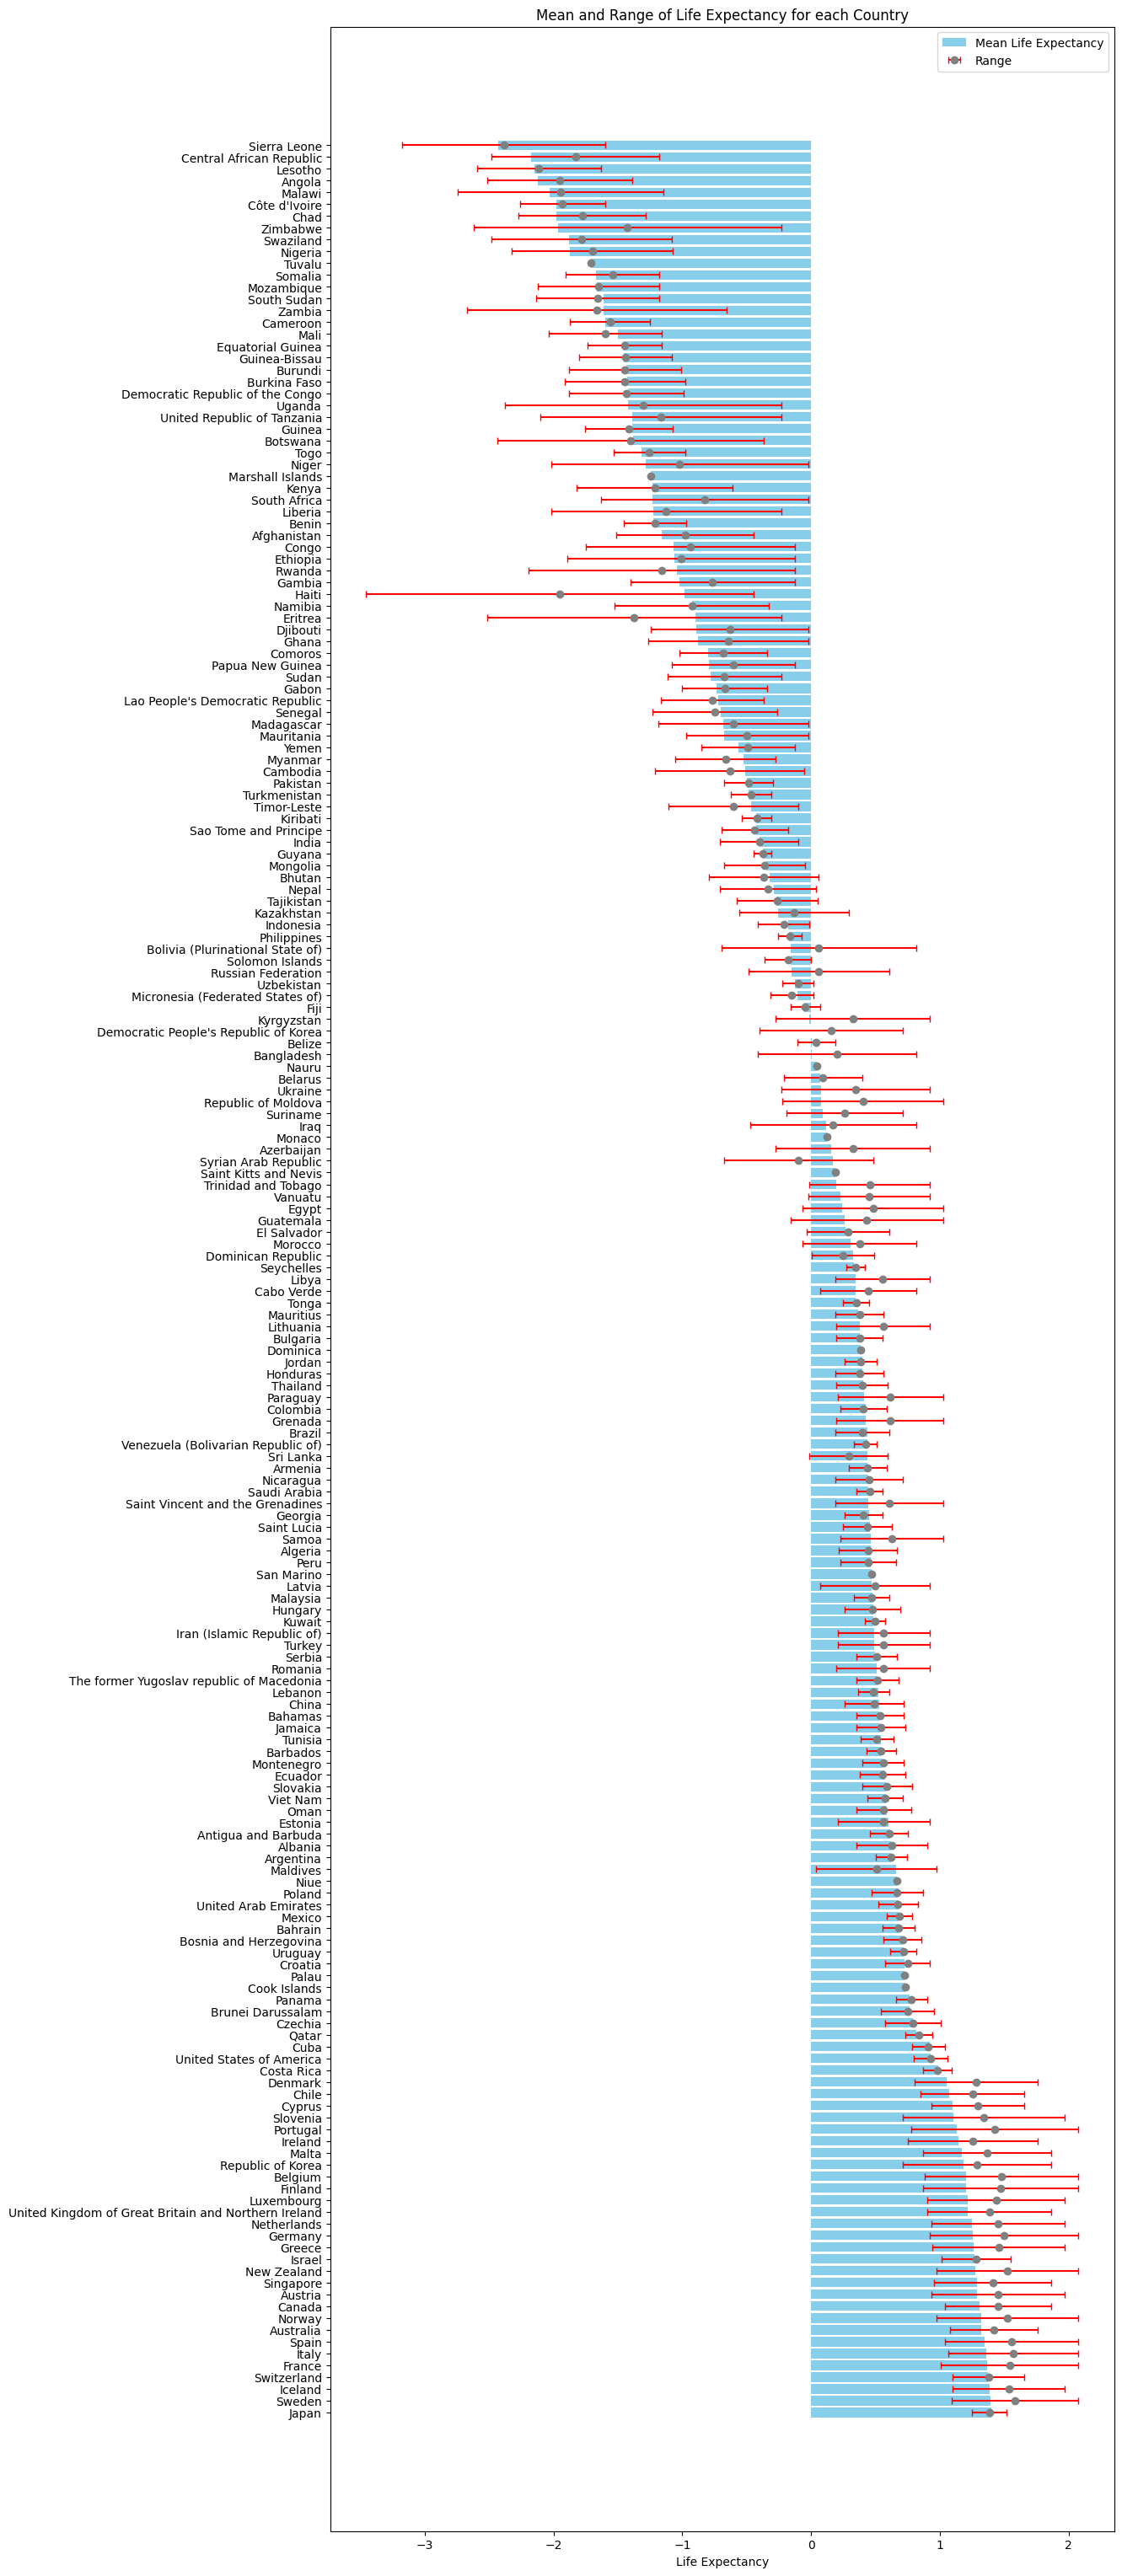

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("Cleaned-Life-Exp.csv").dropna()
# df.info()

country_counts = df["Country"].value_counts().sort_values()
unique_countries = df["Country"].nunique()
print(f"Unique countries: {unique_countries}")
print(country_counts)


country_stats = df.groupby("Country")["Life expectancy"].agg(['mean', 'min', 'max'])
country_stats['range_mid'] = (country_stats['max'] + country_stats['min']) / 2
country_stats['range'] = country_stats['max'] - country_stats['min']
country_stats_sorted = country_stats.sort_values(by='mean', ascending=False)

# plt.figure(figsize=(12, 8) //huot ang countries
plt.figure(figsize=(12, len(country_stats_sorted) * 0.2))
plt.barh(country_stats_sorted.index, country_stats_sorted['mean'], color='skyblue', label='Mean Life Expectancy')
# range errorbar
plt.errorbar(country_stats_sorted['range_mid'], country_stats_sorted.index, xerr=country_stats_sorted['range'] / 2, fmt='o', color='gray', ecolor='red', capsize=3, label='Range')
plt.xlabel("Life Expectancy")
plt.title("Mean and Range of Life Expectancy for each Country")
plt.legend()
plt.show()

# max_life_exp = df['Life expectancy'].max()
# max_country = df[df['Life expectancy'] == max_life_exp]['Country'].values[0]
# min_life_exp = df['Life expectancy'].min()
# min_country = df[df['Life expectancy'] == min_life_exp]['Country'].values[0]
# max_mean_country = country_stats_sorted['mean'].idxmax()
# max_mean_value = country_stats_sorted['mean'].max()
# min_mean_country = country_stats_sorted['mean'].idxmin()
# min_mean_value = country_stats_sorted['mean'].min()
# print(f"Country with Maximum Life Expectancy of all time: {max_country} ({max_life_exp:.2f})")
# print(f"Country with Minimum Life Expectancy of all time: {min_country} ({min_life_exp:.2f})")
# print(f"Country with Maximum Mean Life Expectancy: {max_country} ({max_value:.2f})")
# print(f"Country with Minimum Mean Life Expectancy: {min_country} ({min_value:.2f})")
